In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import table
from scipy.optimize import curve_fit
from fonctions_maison import *

On importe les données

In [2]:
lamda_doublet, counts_doublet = np.loadtxt("Données/doublet_sodium.txt", unpack = True, skiprows = 17)

lamda_or_brute, counts_or_brute = np.loadtxt("Données/echantillon_or.txt", unpack = True, skiprows = 17)
lamda_or_calib, counts_or_calib = np.loadtxt("Données/sans_echantillon_or.txt", unpack = True, skiprows = 17)

lamda_GaSe_brute, counts_GaSe_brute = np.loadtxt("Données/echantillon_GaSe.txt", unpack = True, skiprows = 17)
lamda_GaSe_calib, counts_GaSe_calib = np.loadtxt("Données/sans_echantillon_GaSe.txt", unpack = True, skiprows = 17)

lamda_un_0, counts_un_0 = np.loadtxt("Données/un0.txt", unpack = True, skiprows = 17)

lamda_deux_0, counts_deux_0 = np.loadtxt("Données/deux0.txt", unpack = True, skiprows = 17)

lamda_trois_0, counts_trois_0 = np.loadtxt("Données/trois0.txt", unpack = True, skiprows = 17)

lamda_vitre_0, counts_vitre_0 = np.loadtxt("Données/vitre0.txt", unpack = True, skiprows = 17)


On fit le doublet de sodium pour déterminer la résolution du spectrographe

H = 3165.690117546604, A = 55778.20194856248, x0 = 588.4706966006324, sigma = 0.6845731444903931


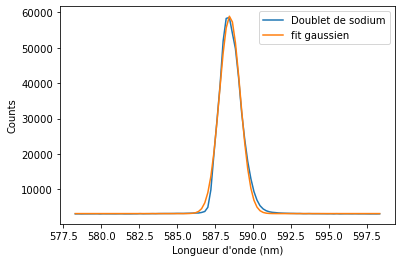

In [3]:
lamda_doublet_gauss, counts_doublet_gauss = lamda_doublet[1100:1200], counts_doublet[1100:1200] #On isole la gaussienne

#Faison un fit gaussien sur la courbe
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

p0 = [2000, 6e4, 587, 3] #Initial guess
p_opt, p_cov = curve_fit(gauss, lamda_doublet_gauss, counts_doublet_gauss, p0)
print("H = {}, A = {}, x0 = {}, sigma = {}".format(p_opt[0], p_opt[1], p_opt[2], p_opt[3]))

H, A, x0, sigma = p_opt[0], p_opt[1], p_opt[2], p_opt[3]

y_fit = gauss(lamda_doublet_gauss,H, A, x0, sigma)

plt.plot(lamda_doublet_gauss, counts_doublet_gauss, label = "Doublet de sodium")
plt.plot(lamda_doublet_gauss, y_fit, label = "fit gaussien")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Graphiques/fit_gaussien.pdf")
plt.show()

Détermination de la résolution pour l'incertitude

In [4]:
fwhm = 2.35*sigma #Largeur à mi-hauteur de la gaussienne

res = x0/fwhm
print("Résolution du spectromètre: {}".format(res)) #Résolution du spectromètre

def erreur_lambda(lamda): 
    
    inc = lamda/res

    return inc



Résolution du spectromètre: 365.79445804824735


gap d'énergie/phonon

Comparaison entre spectres GaSe brute et spectre de calibration


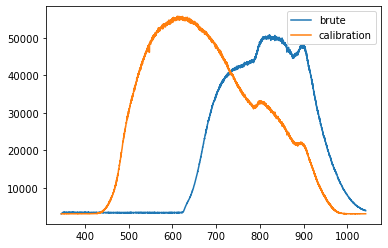

Pourquoi les spectres sont décalés?


In [5]:
with open("Données/echantillon_GaSe.txt") as GaSe_brute:
    int_time_brute = float(list(GaSe_brute)[8].split(":")[1].split("(")[0])
    
with open("Données/sans_echantillon_GaSe.txt") as GaSe_calib:
    int_time_calib = float(list(GaSe_calib)[8].split(":")[1].split("(")[0])
    
# Normalisons le spectre du GaSe   
counts_GaSe_norm = (counts_GaSe_brute/int_time_brute)/(counts_GaSe_calib/int_time_calib)

print("Comparaison entre spectres GaSe brute et spectre de calibration")
plt.plot(lamda_GaSe_brute, counts_GaSe_brute, label = "brute")
plt.plot(lamda_GaSe_brute, counts_GaSe_calib, label = "calibration")
plt.legend()
plt.show()

print("Pourquoi les spectres sont décalés?")

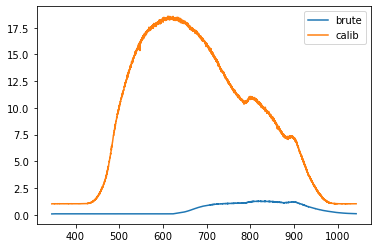

Ils ne sont pas décalés, mais tu avais plutôt oublié de divisé par le temps d'intégration.


In [6]:
plt.plot(lamda_GaSe_brute,counts_GaSe_brute/int_time_brute, label = "brute")
plt.plot(lamda_GaSe_calib,counts_GaSe_calib/int_time_calib, label = "calib")
plt.legend()
plt.show()

print("Ils ne sont pas décalés, mais tu avais plutôt oublié de divisé par le temps d'intégration.")

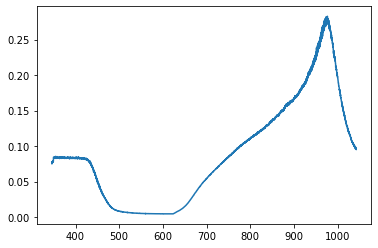

Voici le spectre d'absorption


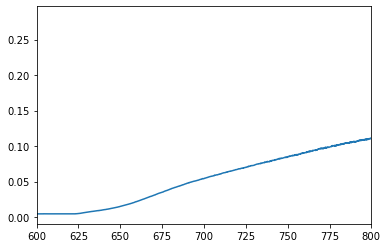

Voici la zone d'importance pour trouver l'énergie de gap et de phonon


In [7]:
plt.plot(lamda_GaSe_calib,counts_GaSe_norm, label = "normalisé")
plt.show()

print("Voici le spectre d'absorption")

plt.plot(lamda_GaSe_calib,counts_GaSe_norm, label = "normalisé")
plt.xlim([600,800])
plt.show()

print("Voici la zone d'importance pour trouver l'énergie de gap et de phonon")

Fréquence de plasma de l'or

Comparaison entre spectres d'or brute et spectre de calibration


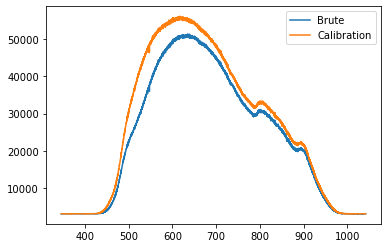

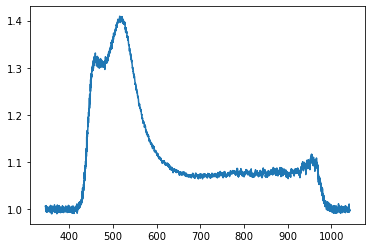

Est-ce que le pic dans le graphique correspond à la fréquence de plasma? 


In [8]:
print("Comparaison entre spectres d'or brute et spectre de calibration")

plt.plot(lamda_or_brute, counts_or_brute, label = "Brute")
plt.plot(lamda_or_calib, counts_or_calib, label = "Calibration")
plt.legend()
plt.show()

plt.plot(lamda_or_brute, counts_or_calib/counts_or_brute)
plt.show()

print("Est-ce que le pic dans le graphique correspond à la fréquence de plasma? ")

Fit gaussien du pic d'absorption de l'or

H = 1.0564512150720493 +/- 0.0007502592124811847, A = 0.34398506826772274 +/- 0.0024825705878519797, x0 = 511.03474602735866 +/- 0.3500948438530101, sigma = 43.01217200839062 +/- 0.374238301091116


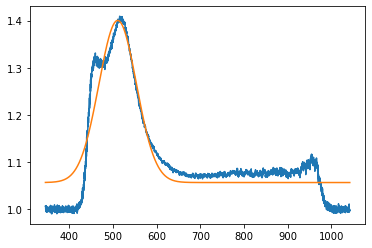

La fréquence plasma de l'or est de 511.03474602735866 +- 0.3500948438530101 nm


In [9]:
counts_or_norm = counts_or_calib/counts_or_brute


p0 = [2000, 6e4, 587, 3] #Initial guess
gauss_or, p_opt, p_cov = fit_gaussien(lamda_or_brute, counts_or_norm, p0 = p0)

print("La fréquence plasma de l'or est de {} +- {} nm".format(p_opt[2], p_cov[2]))

Régression linéaire sur le spectre du GaSe 

a = 0.0005961512486678806 +/- 1.4533115941226417e-06 et b = -0.36311814977978524 +/- 0.001073827394103372


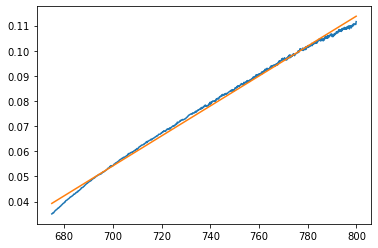

a = 0.0007972468469382458 +/- 4.318188757492538e-06 et b = -0.5037966664243916 +/- 0.002849671918022728


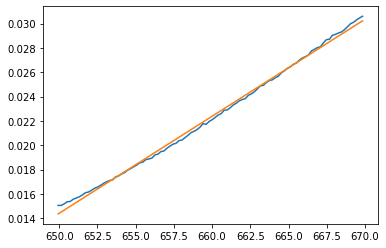

In [11]:
i_gap_debut, i_gap_fin = find_nearest(lamda_GaSe_brute, 675), find_nearest(lamda_GaSe_brute, 800) 
i_phonon_debut, i_phonon_fin = find_nearest(lamda_GaSe_brute, 650), find_nearest(lamda_GaSe_brute, 670) 
x_gap, y_gap = lamda_GaSe_brute[i_gap_debut:i_gap_fin], counts_GaSe_norm[i_gap_debut:i_gap_fin]
x_phonon, y_phonon = lamda_GaSe_brute[i_phonon_debut:i_phonon_fin], counts_GaSe_norm[i_phonon_debut:i_phonon_fin]

y_fit_gap, popt_gap, perr_gap = reg_lin(x_gap,y_gap)
y_fit_phonon, popt_phonon, perr_phonon = reg_lin(x_phonon,y_phonon)



In [14]:
from scipy.constants import h, c

lamda_gap = -popt_gap[0]/popt_gap[1] #Abscisses à l'origine
lamda_phonon = -popt_phonon[0]/popt_phonon[1]

E_gap = h*c/lamda_gap
E_phonon = h*c/lamda_phonon - E_gap

print("L'énergie de gap est {} J et l'énergie des phonons est {}".format(E_gap, E_phonon))

L'énergie de gap est 1.209952249361952e-22 J et l'énergie des phonons est 4.532371028281769e-24
